In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [14]:

data=pd.read_csv("titanic11.csv")

In [15]:
data.head()
data["Sex"]=data["Sex"].map({"male":1,"female":0})
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,family_size
0,343,0,2,1,28.0,0,0,248740,13.0000,0,2,0
1,76,0,3,1,25.0,0,0,348123,7.6500,0,2,0
2,641,0,3,1,20.0,0,0,350050,7.8542,0,2,0
3,568,0,3,0,29.0,0,4,349909,21.0750,0,2,4
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,0,2,1


In [36]:
df=data.drop(["Survived","PassengerId","Ticket","Fare"],axis=1)
x=df
y=data["Survived"]
features=list(df.columns)
features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Title', 'family_size']

In [37]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [54]:



#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree1= tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7597765363128491


In [19]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [ ]:
tree.plot_tree(tree1,
               feature_names = features, 
            
               filled = True)               
               

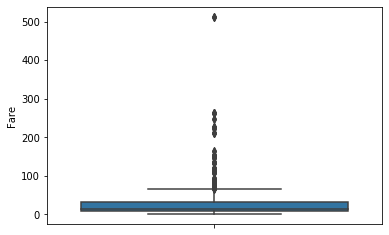

In [28]:
sns.boxplot(y="Fare",data=x)


In [31]:
x["Fare"].describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [44]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,family_size
0,2,1,28.0,0,0,0,2,0
1,3,1,25.0,0,0,0,2,0
2,3,1,20.0,0,0,0,2,0
3,3,0,29.0,0,4,0,2,4
4,1,1,31.0,1,0,0,2,1


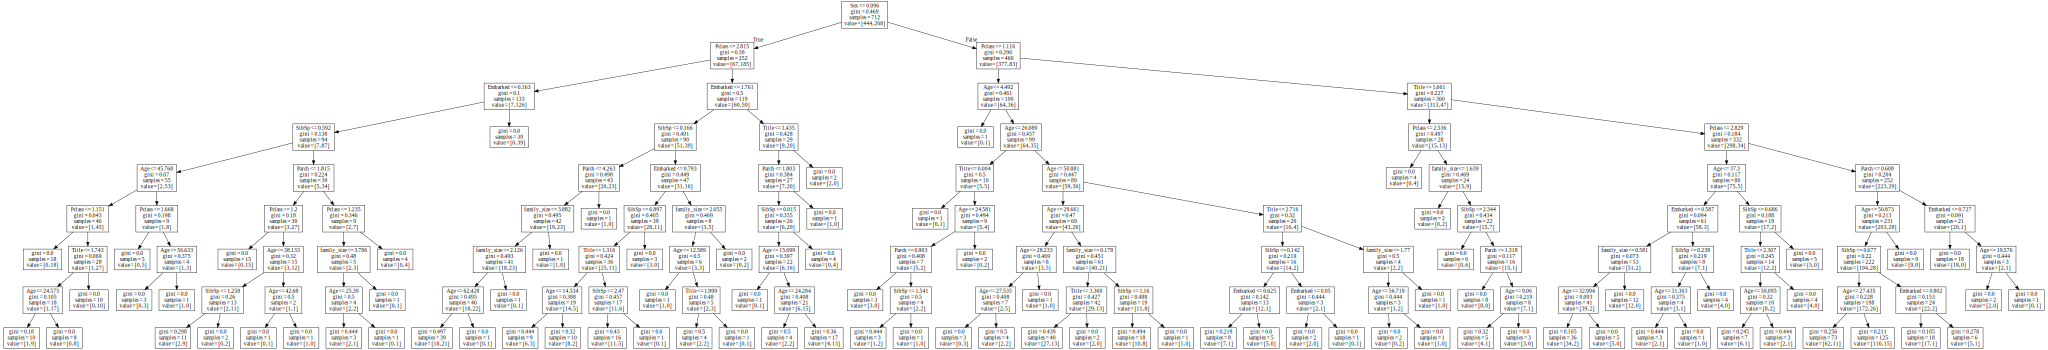

In [71]:
import networkx.drawing.nx_agraph 

import graphviz
features=list(x.columns)
dot_data=tree.export_graphviz(tree1,out_file=None,feature_names=features)
graph=graphviz.Source(dot_data)
graph.render("data")
#tree1=tree.DecisionTreeClassifier(criterion="gini",splitter="random",max_depth="5")
graph



In [50]:
tree1.get_depth(
)

19

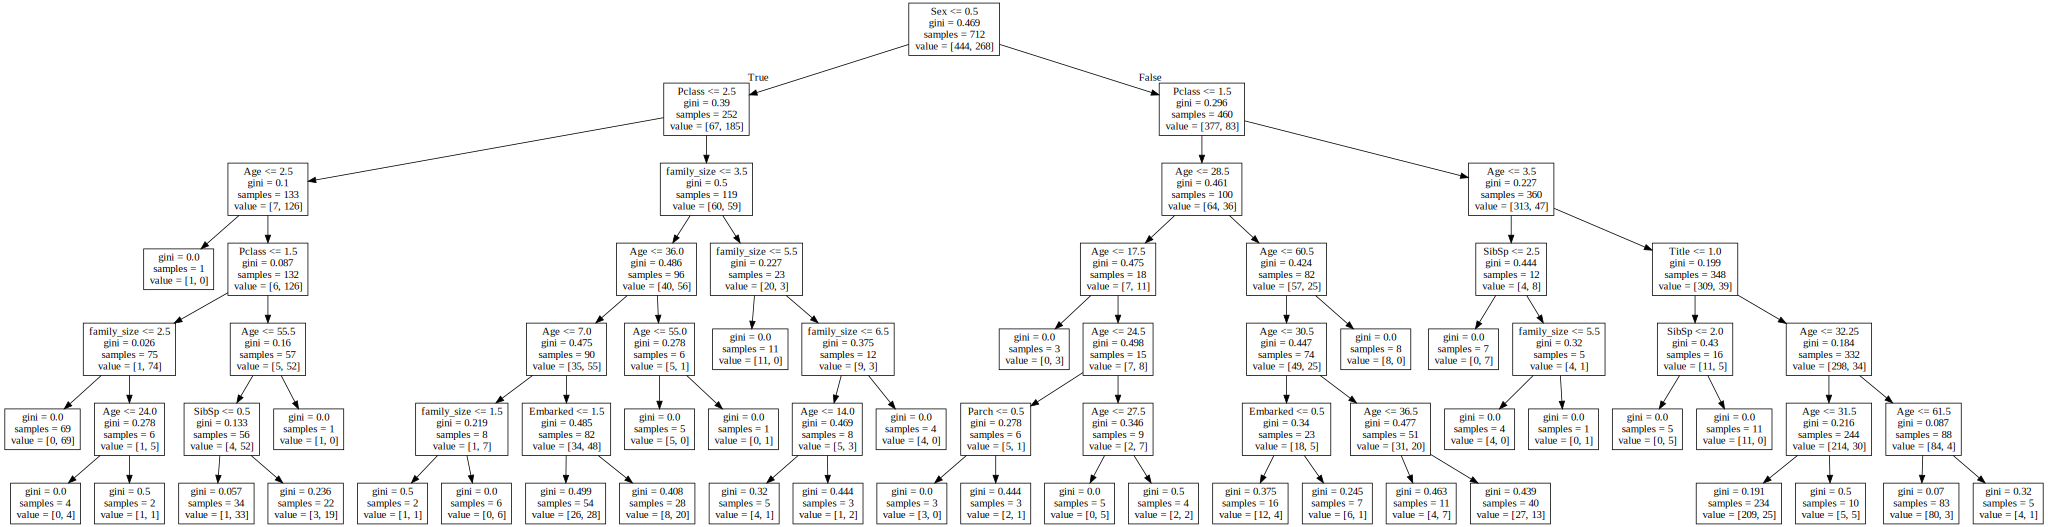

In [98]:
import graphviz
tree1=tree.DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=6)
tree1.fit(x_train, y_train)  
y_pred=tree1.predict(x_test) 
dot_data=tree.export_graphviz(tree1,out_file=None,feature_names=features)
graph=graphviz.Source(dot_data)
graph.render("data")
graph


In [100]:
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.8379888268156425


In [112]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=70,max_depth=6) #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8324022346368715


array([0], dtype=int64)